In [1]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from ae_model import AeNet
from kdd_oh_set import ohkdd

In [2]:
use_gpu = torch.cuda.is_available()
train_data = ohkdd(use_gpu=use_gpu,test_size=0)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
print("use_gpu:{}".format(use_gpu))

use_gpu:True


In [3]:
net = AeNet(126, [100, 80, 60, 40, 20, 10, 1, 10, 20, 40, 60, 80, 100])
loss_func = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-4)

In [4]:
%%time
loss_count = []
if use_gpu:
    net = net.cuda()
    loss_func = loss_func.cuda()

for epoch in range(6):
    for i, (x, _) in enumerate(train_loader):
        batch_x = Variable(x)

        out = net(batch_x)  #模型输出
        # print(out.shape)
        loss = loss_func(out, batch_x)  #损失计算

        opt.zero_grad()  #消除旧值
        loss.backward()  #回传
        opt.step()  #更新模型参数

        if i % 10000 == 0:  #打点输出
            loss_count.append(loss)
            print("{}th{}:\t".format(epoch + 1, i), loss.item())

    torch.save(net, r'aenet_1key')  #存储模型

1th0:	 0.14644311368465424
1th10000:	 0.013621124438941479
1th20000:	 0.012103158980607986
1th30000:	 0.008398504927754402
1th40000:	 0.010961543768644333
2th0:	 0.009168832562863827
2th10000:	 0.006057834252715111
2th20000:	 0.007153760176151991
2th30000:	 0.006998512428253889
2th40000:	 0.005660294089466333
3th0:	 0.008000307716429234
3th10000:	 0.006584084592759609
3th20000:	 0.008345366455614567
3th30000:	 0.01005604863166809
3th40000:	 0.0055359299294650555
4th0:	 0.008905993774533272
4th10000:	 0.008120376616716385
4th20000:	 0.006600051652640104
4th30000:	 0.006502622272819281
4th40000:	 0.006057984661310911
5th0:	 0.004388701636344194
5th10000:	 0.00608809432014823
5th20000:	 0.006153288763016462
5th30000:	 0.008211150765419006
5th40000:	 0.006580399349331856
6th0:	 0.007433505263179541
6th10000:	 0.005701784510165453
6th20000:	 0.00404653325676918
6th30000:	 0.005402507726103067
6th40000:	 0.007034721318632364
Wall time: 22min 7s


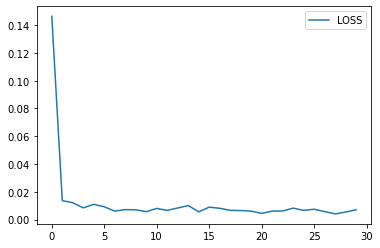

In [5]:
plt.figure('aenet_loss')
plt.plot(loss_count, label='LOSS')
plt.legend()
plt.show()